In [4]:
# import libraries
import cv2
from matplotlib import pyplot as plt
# config pytesseractz
import pytesseract
from PIL import Image
# Json y tiempo para ensamblar paquetes
import json 
import time
# para procesamiento de datos
from collections import Counter
#Para servicios rests
import requests

In [2]:
#inicializar camara web
camera = cv2.VideoCapture(0)

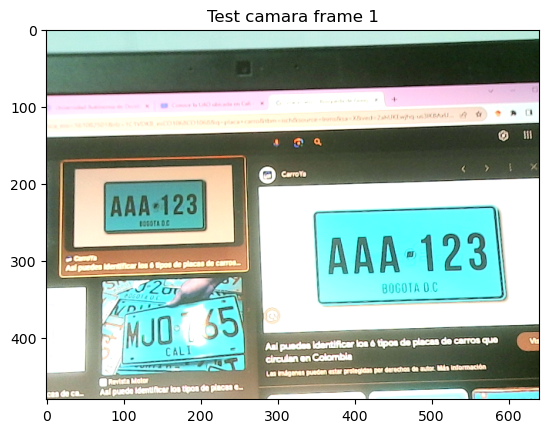

In [3]:
# tomar una frama de video de la camara

imageFrames = []

# tomar 15 muestras de la foto
for x in range(15):
    ret, frame = camera.read()
    imageFrames.append(frame)
    
# mostrar una de las framas capturadas
plt.imshow(imageFrames[0])
plt.title('Test camara frame 1')
plt.show()

Altura: 480 Ancho: 640


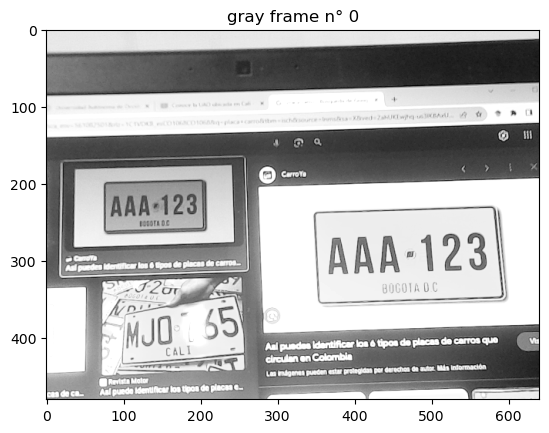

In [4]:
#Convertir a escala de grises

grayFrames = []

for frame in imageFrames:
    grayFrames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))


height, width = grayFrames[0].shape
print("Altura: " + str(height) + " Ancho: " + str(width))
plt.imshow(grayFrames[0], cmap="gray")
plt.title('gray frame n° 0')
plt.show()

In [5]:
# Crear metodo para recortar las placas o bien, reconocer solo los caracteres mas grandes, que serian los propios de la placa


In [6]:
#Llamar a pytesseract e iterar sobre las framas a procesar

ocrStrings = []

for frameToProcess in grayFrames:
    tmpString = pytesseract.image_to_string(frameToProcess, config='--psm 12')
    ocrStrings.append(tmpString)


In [7]:
choppedStrings = []
# nota, por alguna razon cuando se hace el replace dentro del for anterior no funciona como deberia
for strings in ocrStrings:
    returnString = strings.replace("\n", "")
    #shortedTest = tmpString.replace(" ", "")
    choppedStrings.append(returnString)


#Revisamos que cadena se repite mas entre las 15 capturas, con la finalidad de minimizar falsos positivos por blur en la imagen 
counterProm = Counter(choppedStrings)
mostRepeatedString = max(counterProm, key=counterProm.get)


print(mostRepeatedString)


CnOeCO ele helen eatinT2aANA-123|MJpe fee5Cleeee TyeT


In [18]:
#Armar json
#tmpObj = {"TIME": time.time() , "PLACA": mostRepeatedString}
#Json prueba (no hay camara)
tmpObj = {"timeStamp": int(time.time()) , "placa": "AAA-551"}
jsonToSend = json.dumps(tmpObj)

print("json: " + jsonToSend) 
print(tmpObj)

json: {"timeStamp": 1696374029, "placa": "AAA-551"}
{'timeStamp': 1696374029, 'placa': 'AAA-551'}


In [19]:
#Enviar JSON a API REST Spring

urlServer = "https://fluffy-wasps-return.loca.lt/"
endPointRegistroDatos = "/GR1/controlAcceso/addRegistro"


sendRequest = requests.post(urlServer+endPointRegistroDatos, json=tmpObj)
print(sendRequest)


<Response [200]>


In [22]:
#Verificar vehiculo autorizado

endpointVerficiarPlaca = "GR1/controlAcceso/verificarPlaca/"
placa = str(input("Placa a verificar : "))

requestVerificacion = requests.get(urlServer+endpointVerficiarPlaca+placa)
print(requestVerificacion.content)



Placa a verificar : JOX01E
b'false'


In [23]:
#Agregar vehiculo autorizado

endpointAgregarAutorizado = "/GR1/controlAcceso/agregarVehiculo"

jsonAutorizado = {
    "nombreTitular": "El pepe",
  "apellidoTitular": "Rodriguez",
  "marcaVehiculo": "Chevrolet",
  "colorVehiculo": "Azul",
  "placa": "JJJ:933"
}

requestAddVehiculo = requests.post(urlServer+endpointAgregarAutorizado, json=jsonAutorizado)

print(requestAddVehiculo)

<Response [200]>


In [22]:
#Verificar vehiculo autorizado

endpointVerficiarPlaca = "GR1/controlAcceso/verificarPlaca/"
placa = str(input("Placa a verificar : "))

requestVerificacion = requests.get(urlServer+endpointVerficiarPlaca+placa)
print(requestVerificacion.content)



Placa a verificar : JOX01E
b'false'


In [11]:
#Envia de Json a API rest
direccionIpServer = "192.168.2.232"
puertoServer = "8000"

#sendRequest = requests.post("http://"+direccionIpServer+":"+puertoServer, jsonToSend)
# Test server interno
sendRequest = requests.post("http://"+direccionIpServer+":"+puertoServer, jsonToSend)
#sendRequest = requests.post("http://192.168.2.232:"+puertoServer+"/datos", jsonToSend)


In [3]:
#Envia de Json a API Ubidots
direccionServer1 = "https://things.ubidots.com/api/v1.6/devices/"
token = "BBFF-saFjmnERoLZP1spZ6J3GsrZmBr38Qx"

tokenVar = "/?token=" + token
nombreDispositivo = "TestJson"

#sendRequest = requests.post("http://"+direccionIpServer+":"+puertoServer, jsonToSend)
# Test server interno
sendRequest = requests.post(direccionServer1+nombreDispositivo+tokenVar, jsonToSend)
#sendRequest = requests.post("http://192.168.2.232:"+puertoServer+"/datos", jsonToSend)


In [4]:
#Status request

print(sendRequest)

<Response [200]>


In [ ]:
#DEBUG

dataInImage = pytesseract.image_to_data(grayFrames[0], config='--psm 12')

print(dataInImage)
